## infected virus sample을 이용한 feature importance 알아보기

* scikit-learn을 이용해 sample에서 feature importance를 알아본다
* 사용 모델: RandomForestClassifier

---

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_vir = pd.read_csv('./Arabidopsis_infected_virus/E-ATMX-34-A-AFFY-2-normalized-expressions.tsv',sep='\t',comment='#')

In [3]:
df_vir.head()

,Gene ID,Gene Name,DesignElementAccession,H_12CaLCuV-P,H_12CaLCuV-R,H_12Mock-R,H_12CaLCuV-Q,H_12Mock-Q,H_12Mock-P
0,AT1G01010,NAC001,261585_at,3.954299,4.133589,2.682620,3.392546,3.502393,2.547950
1,AT1G01030,NGA3,261568_at,2.479785,2.540493,2.842658,2.374759,2.831915,2.696394
2,AT1G01040,DCL1,261584_at,3.075865,2.906572,2.527687,2.730614,2.650926,2.420992
3,AT1G01050,PPA1,261579_at,7.101500,6.770761,5.585015,7.304984,6.686611,6.959806
4,AT1G01060,LHY,261569_at,6.508019,5.265953,3.685536,6.135907,3.475033,4.175904


In [4]:
c = df_vir.columns[[1,3,4,5,6,7,8]]
df_vir_c_ix = df_vir[c].set_index('Gene Name').fillna(0)

In [5]:
df_vir_c_ix.head()

,H_12CaLCuV-P,H_12CaLCuV-R,H_12Mock-R,H_12CaLCuV-Q,H_12Mock-Q,H_12Mock-P
Gene Name,,,,,,
NAC001,3.954299,4.133589,2.682620,3.392546,3.502393,2.547950
NGA3,2.479785,2.540493,2.842658,2.374759,2.831915,2.696394
DCL1,3.075865,2.906572,2.527687,2.730614,2.650926,2.420992
PPA1,7.101500,6.770761,5.585015,7.304984,6.686611,6.959806
LHY,6.508019,5.265953,3.685536,6.135907,3.475033,4.175904


In [6]:
X = df_vir_c_ix.values.T

In [7]:
#H_12CaLCuV-P 형식에서 H_12CaLCuV 형식으로 이름 변경
samples = []
for i in df_vir_c_ix.columns:
    sample = i.split('-')[0]
    samples.append(sample)

samples_ix = list(set(samples))    #중복 제거

#분류 항목을 binary 형식으로 변경
y = []
for i in df_vir_c_ix.columns:
    sample = i.split('-')[0]
    y.append(samples_ix.index(sample))

In [8]:
#RandomForestClassifier를 이용한 분류 작업
rf = RandomForestClassifier(n_estimators=2000,random_state=0)

In [9]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

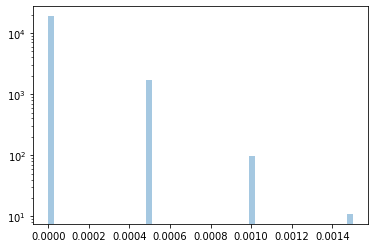

In [10]:
#feature importance 확인하기
ax = sb.distplot(rf.feature_importances_, kde=False)
ax.set_yscale('log')

In [11]:
#특정 feature importance 이상의 데이터만 골라 마스킹
m = rf.feature_importances_ > 0.0008

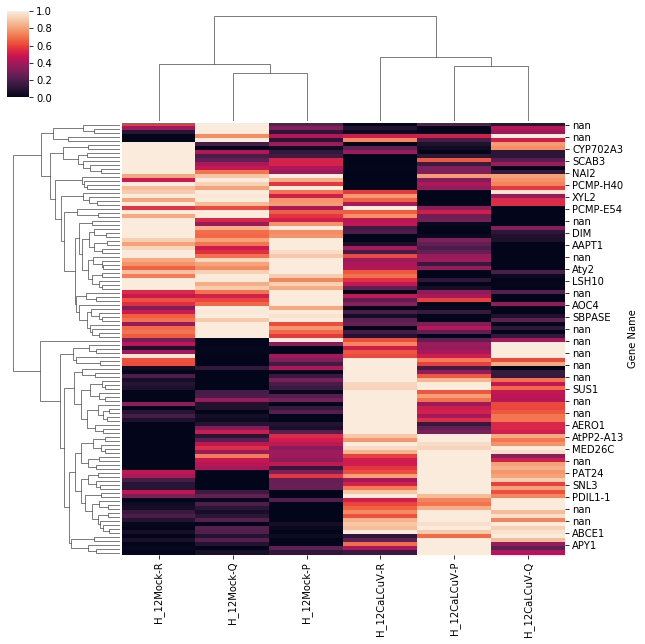

In [12]:
sb.clustermap(df_vir_c_ix[m],standard_scale=0)